<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r5-i2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-15-m-1-r5.csv?token=AKVFSOBWKYXIRA76WSCXAKC63IPFO')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-15-m-11-r5.csv?token=AKVFSOG4BTBXRS6QBNRTBWS63IPFS')

df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-4-m-1-r5.csv?token=AKVFSOAD6SCZNGAWGNY5B5K63IPFY')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-4-m-11-r5.csv?token=AKVFSOAUSUTTS4YZACOHXWK63IPF2')

df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-6-m-1-r5.csv?token=AKVFSOBIX4FWQHN3PNSROYC63IPF6')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-6-m-11-r5.csv?token=AKVFSOEOPQYYDLWWZ44JES263IPGC')

df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-9-m-1-r5.csv?token=AKVFSOEDD5O46YUWQMLOIK263IPGG')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-9-m-11-r5.csv?token=AKVFSOFT6MXUVZQ7ETX4AJS63IPGK')

df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-normal-n-0-15-r5.csv?token=AKVFSOCGSVWLPJVTTUYPXVK63IPGU')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-normal-n-0-4-r5.csv?token=AKVFSOFKGNJGN7IA7QE3RDS63IPGY')
df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-normal-n-0-6-r5.csv?token=AKVFSOFFPOKXYYSVZXBWPEK63IPHA')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-normal-n-0-9-r5.csv?token=AKVFSODQCBEUVCHTJMWVSYC63IPHE')

In [4]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df11.shape)
print(df12.shape)

(73806, 26)
(52701, 26)
(90606, 26)
(69643, 26)
(83817, 26)
(62955, 26)
(82090, 26)
(60712, 26)
(34357, 26)
(51024, 26)
(44745, 26)
(42660, 26)


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df5, ignore_index=True,sort=False)
df = df.append(df6, ignore_index=True,sort=False)
df = df.append(df7, ignore_index=True,sort=False)
df = df.append(df8, ignore_index=True,sort=False)
df = df.append(df9, ignore_index=True,sort=False)
df = df.append(df10, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)

df = df.sort_values('timestamp')
df.to_csv('fft-r4-train.csv',index=False)

In [6]:
df = pd.read_csv('fft-r4-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,11,2,4,1,1,4,3,9,4,4,23,7,2,3,1,0.333333,8,69,1,69,69,8,8,3,27,1
1,11,2,4,1,1,4,3,9,4,4,23,7,2,3,1,0.333333,8,86,1,86,86,8,8,3,27,0
2,11,2,4,1,1,4,3,9,4,4,23,7,3,3,1,0.333333,8,124,1,124,124,8,12,3,27,0
3,66,3,2,4,1,1,5,17,23,7,1,1,2,3,2,0.666667,12,128,1,128,128,6,8,20,340,0
4,66,1,2,4,1,1,5,17,23,7,9,9,2,3,2,0.666667,12,72,1,72,72,2,8,20,340,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749111,3276597,2,4,4,2,2,5,17,20,4,15,15,30092,5,1,0.200000,9,5,14,18,70,8,481472,20,340,0
749112,3276598,2,4,4,3,2,5,17,20,4,15,15,30092,5,1,0.200000,10,4,15,18,60,8,722208,20,340,0
749113,3276599,2,4,4,4,2,5,17,20,4,15,15,30092,5,1,0.200000,11,3,16,18,48,8,962944,20,340,0
749114,3276600,2,4,3,1,4,3,9,20,4,18,2,30092,3,1,0.333333,12,2,17,18,34,8,361104,9,81,0


In [7]:
df.shape

(749116, 26)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-15-m-12-r5.csv?token=AKVFSOFGZZNKP3BWO7VOX4263IPSK')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-15-m-7-r5.csv?token=AKVFSOF5WUCWSF74MB4QTN263IPSO')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-4-m-12-r5.csv?token=AKVFSOESE7NQZBMJMGNJJKS63IPSU')
df16 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-4-m-7-r5.csv?token=AKVFSOGD7BYYDJM2ZRYUJMK63IPSY')
df17 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-6-m-12-r5.csv?token=AKVFSOEPJ4KVGPURPAON72K63IPS4')
df18 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-6-m-7-r5.csv?token=AKVFSODC2EG6QZKGLRW2JSK63IPTK')
df19 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-9-m-12-r5.csv?token=AKVFSOGKFGRCG3JTP3NEO2S63IPTE')
df20 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-9-m-7-r5.csv?token=AKVFSOA2LSYNW3KZKVGJEMS63IPTO')

In [9]:
print(df13.shape)
print(df14.shape)
print(df15.shape)
print(df16.shape)
print(df17.shape)
print(df18.shape)
print(df19.shape)
print(df20.shape)

(50255, 26)
(62551, 26)
(67123, 26)
(79857, 26)
(60189, 26)
(73065, 26)
(58244, 26)
(70972, 26)


In [10]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,80,3,2,4,1,1,5,17,23,7,1,1,2,3,2,0.666667,12,105,1,105,105,6,8,20,340,0
1,81,4,2,1,1,4,3,9,6,6,24,8,4,3,1,0.333333,9,104,2,105,208,8,16,3,27,0
2,82,3,2,4,2,2,5,17,23,7,1,1,2,3,2,0.666667,14,103,3,105,309,6,32,20,340,0
3,83,3,2,4,3,2,5,17,23,7,1,1,2,3,2,0.666667,15,102,4,105,408,6,48,20,340,0
4,84,3,2,4,4,2,5,17,23,7,1,1,2,3,2,0.666667,16,101,5,105,505,6,64,20,340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83812,3266199,4,2,4,1,1,5,17,23,7,0,0,30088,4,2,0.500000,13,5,3,7,15,8,120352,20,340,0
83813,3266200,4,2,4,2,2,5,17,23,7,0,0,30088,4,2,0.500000,14,4,4,7,16,8,481408,20,340,0
83814,3266201,4,2,4,3,2,5,17,23,7,0,0,30088,4,2,0.500000,15,3,5,7,15,8,722112,20,340,0
83815,3266202,4,2,4,4,2,5,17,23,7,0,0,30088,4,2,0.500000,16,2,6,7,12,8,962816,20,340,0


Processing

In [11]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [13]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.250595,-0.020307,0.014424,-0.021815,0.340908,0.339830,-0.007235,0.303156,0.155391,-0.166765,-0.206380,-0.004897,0.025080,0.015047,0.006882,0.536356,-0.022850,0.259028,0.342208,-0.031782
inport,-0.250595,1.000000,-0.166390,-0.005833,0.008821,0.051282,0.005191,-0.059322,0.044429,-0.264342,-0.112474,-0.131291,-0.047385,-0.106367,-0.114621,-0.102984,0.638870,-0.066931,-0.091503,-0.028135,0.040022
cache_coherence_type,-0.020307,-0.166390,1.000000,0.209598,-0.316876,-0.224775,-0.237807,0.048404,-0.070167,-0.117661,-0.157311,-0.164176,0.054700,-0.003150,0.038430,0.032523,-0.169434,0.287735,0.617290,0.105833,0.003071
flit_id,0.014424,-0.005833,0.209598,1.000000,-0.023656,0.242817,0.226803,0.010166,0.044851,0.037675,0.015172,0.390672,-0.029010,0.043069,0.010481,0.007918,-0.002117,0.640279,0.363471,0.311741,-0.010092
flit_type,-0.021815,0.008821,-0.316876,-0.023656,1.000000,-0.367106,-0.342895,-0.015373,-0.067812,-0.056962,-0.022938,0.330012,-0.045788,0.025021,-0.015482,-0.010995,0.003197,0.140110,-0.549512,-0.471307,0.015247
vnet,0.340908,0.051282,-0.224775,0.242817,-0.367106,1.000000,0.990014,-0.017920,0.234116,0.218669,0.108782,-0.406800,-0.025664,0.038230,0.009368,0.000403,0.281612,-0.025799,0.627852,0.942094,-0.088140
vc,0.339830,0.005191,-0.237807,0.226803,-0.342895,0.990014,1.000000,-0.015337,0.209978,0.173770,0.058334,-0.390872,-0.023619,0.049378,0.019203,0.010058,0.245372,-0.030953,0.609379,0.938112,-0.089001
traversal_id,-0.007235,-0.059322,0.048404,0.010166,-0.015373,-0.017920,-0.015337,1.000000,0.004326,0.028547,0.019755,0.038240,0.102486,0.103469,0.153539,0.091527,-0.058010,0.559500,0.024196,-0.001409,-0.247690
hop_count,0.303156,0.044429,-0.070167,0.044851,-0.067812,0.234116,0.209978,0.004326,1.000000,0.465172,-0.136038,0.018915,-0.069803,-0.049602,-0.089015,-0.086544,0.224300,-0.011828,0.132977,0.201752,-0.005178
current_hop,0.155391,-0.264342,-0.117661,0.037675,-0.056962,0.218669,0.173770,0.028547,0.465172,1.000000,0.741069,0.189759,0.009174,0.005147,0.010676,0.000356,-0.143052,-0.016872,0.082568,0.157872,-0.054012


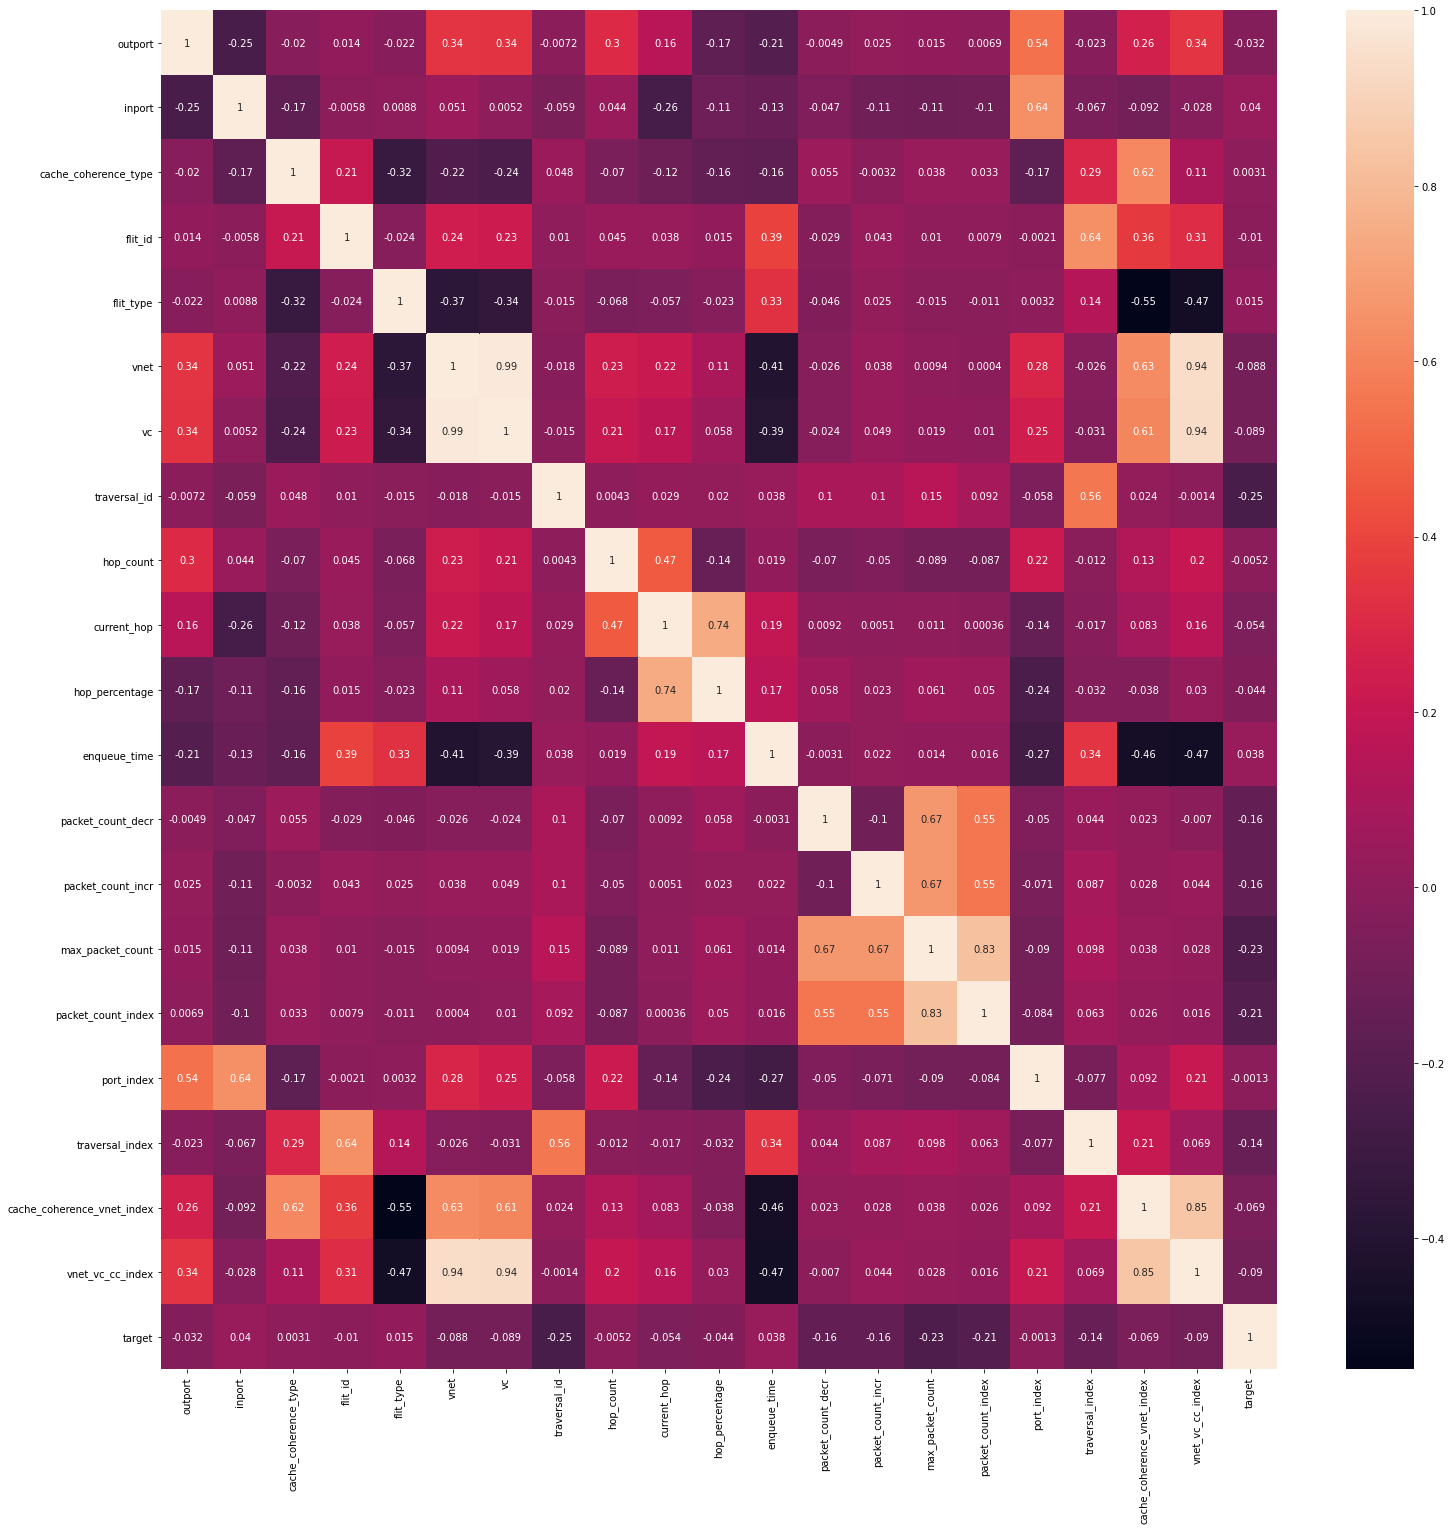

In [14]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [16]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_cc_index', 'vnet']

In [0]:
#df = df.drop(columns=[''])

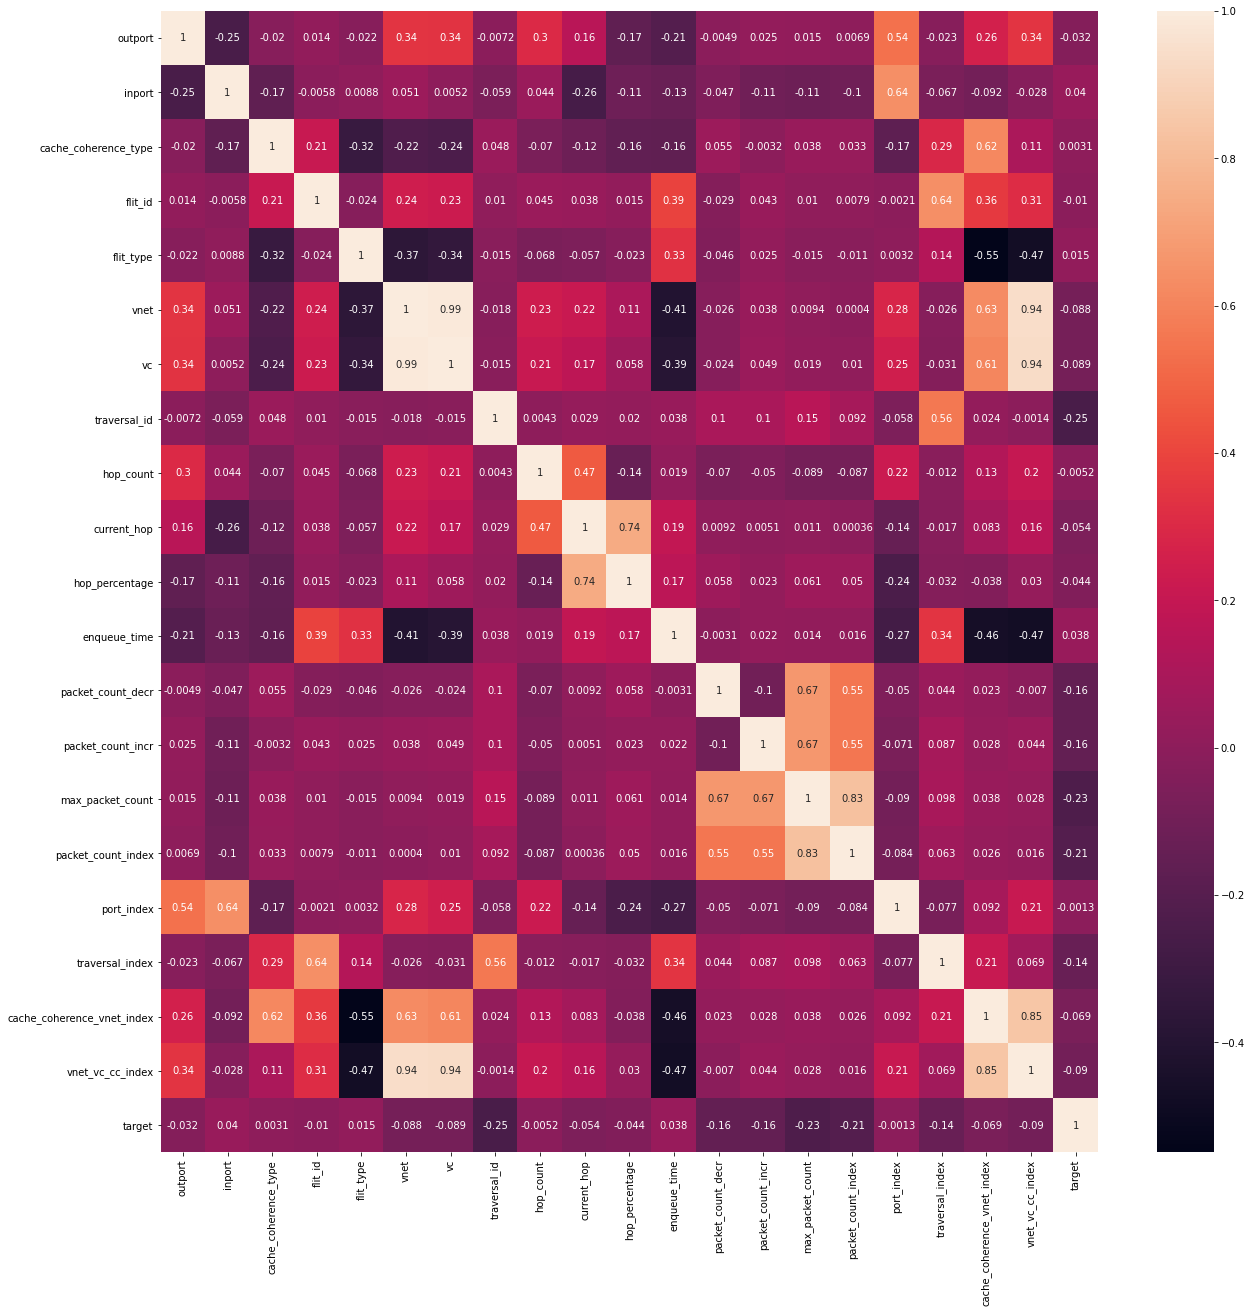

In [18]:
plt.figure(figsize=(21,21))
sns.heatmap(df.corr(), annot = True)
plt.show()

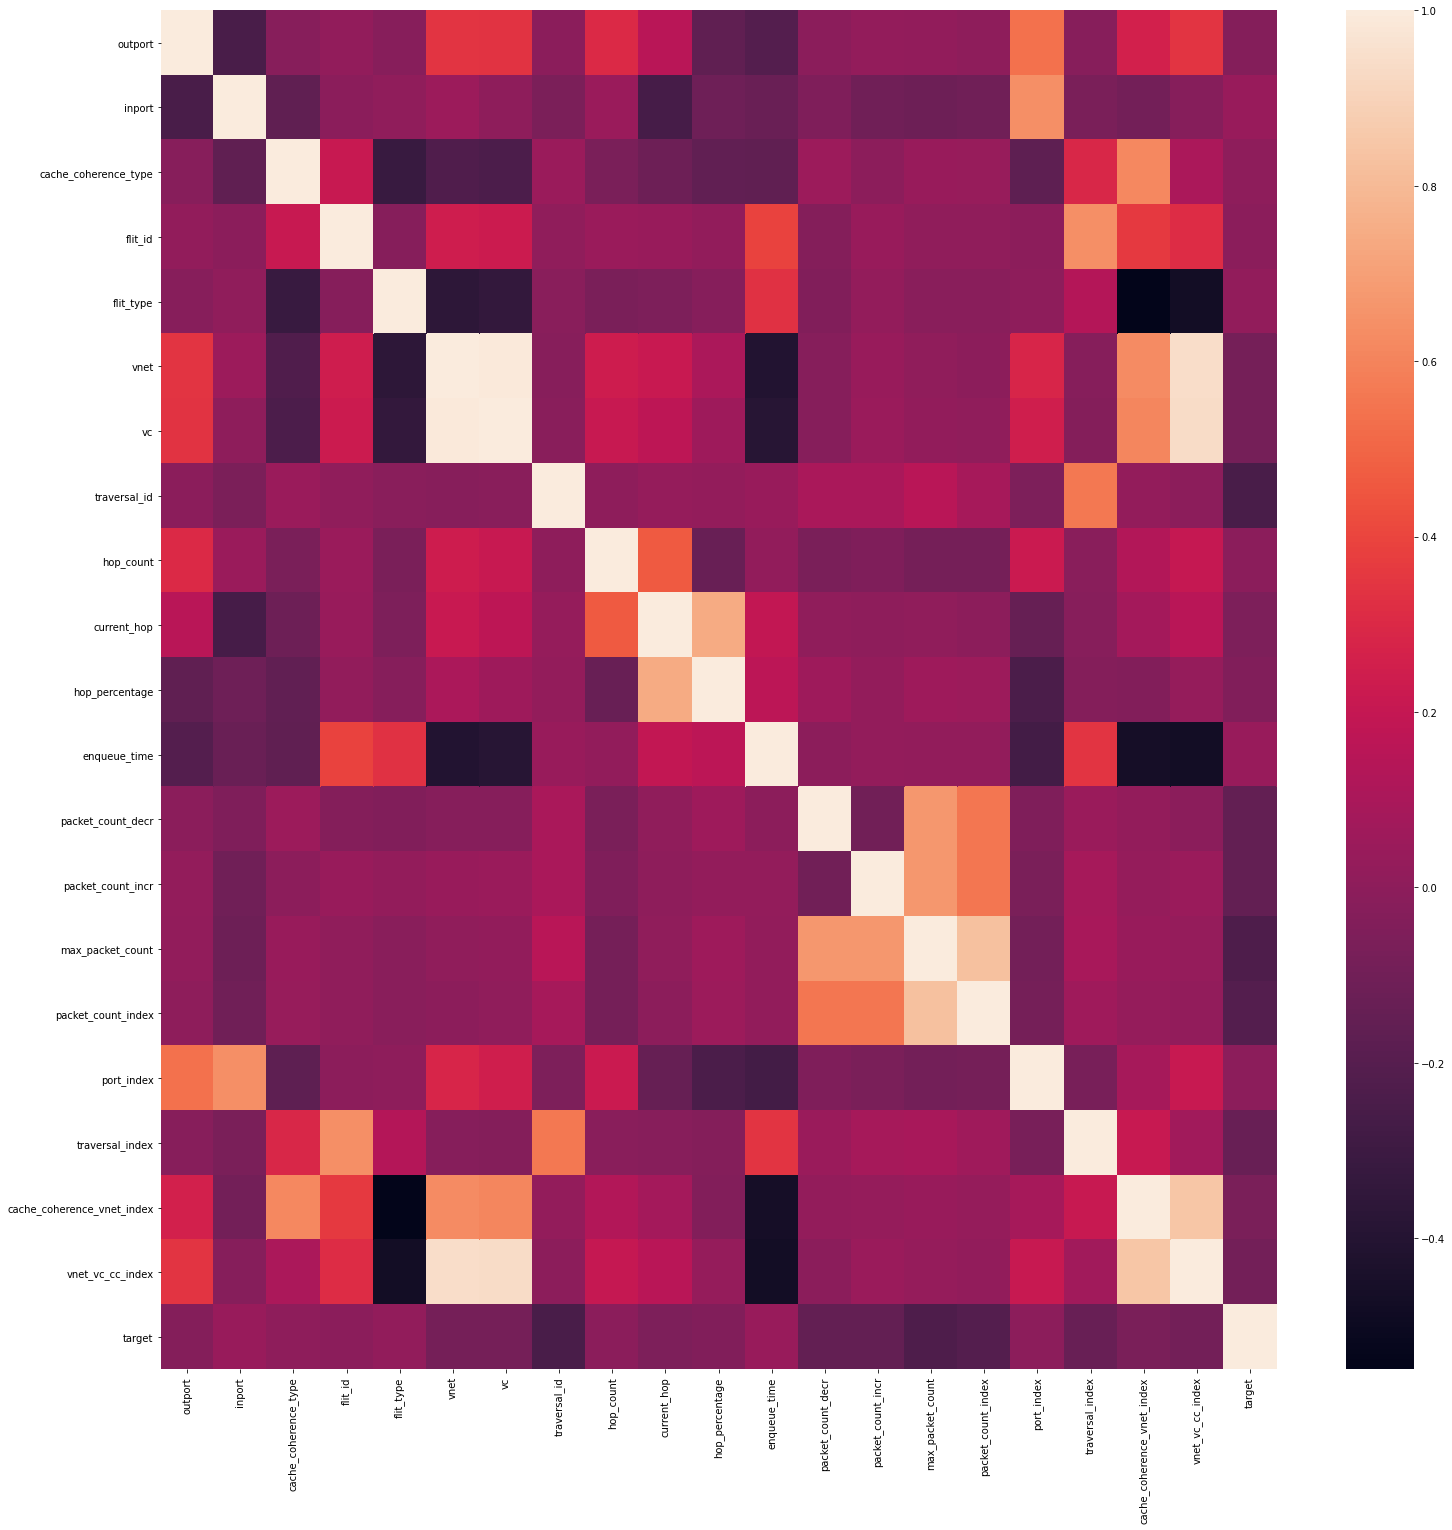

In [19]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [21]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index
0,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.5,0.25,0.333333,0.065574,0.414634,0.000000,0.414634,0.009872,0.666667,0.000001,0.000000,0.000000
1,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.5,0.25,0.333333,0.065574,0.518293,0.000000,0.518293,0.012340,0.666667,0.000001,0.000000,0.000000
2,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000066,0.5,0.25,0.333333,0.065574,0.750000,0.000000,0.750000,0.017857,0.666667,0.000003,0.000000,0.000000
3,0.75,0.5,0.500000,0.00,0.000000,1.0,0.888889,0.000033,0.5,0.50,0.666667,0.131148,0.774390,0.000000,0.774390,0.018438,0.500000,0.000001,0.944444,0.939940
4,0.25,0.5,0.500000,0.00,0.000000,1.0,0.888889,0.000033,0.5,0.50,0.666667,0.131148,0.432927,0.000000,0.432927,0.010308,0.166667,0.000001,0.944444,0.939940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749111,0.50,1.0,0.500000,0.25,0.333333,1.0,0.888889,1.000000,1.0,0.25,0.200000,0.081967,0.024390,0.079268,0.103659,0.010017,0.666667,0.178007,0.944444,0.939940
749112,0.50,1.0,0.500000,0.50,0.333333,1.0,0.888889,1.000000,1.0,0.25,0.200000,0.098361,0.018293,0.085366,0.103659,0.008566,0.666667,0.267012,0.944444,0.939940
749113,0.50,1.0,0.500000,0.75,0.333333,1.0,0.888889,1.000000,1.0,0.25,0.200000,0.114754,0.012195,0.091463,0.103659,0.006823,0.666667,0.356016,0.944444,0.939940
749114,0.50,1.0,0.333333,0.00,1.000000,0.0,0.000000,1.000000,0.5,0.25,0.333333,0.131148,0.006098,0.097561,0.103659,0.004791,0.666667,0.133505,0.333333,0.162162


In [22]:
train_X[train_X.duplicated()].shape

(2640, 20)

In [23]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 20)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index
0,1.0,0.5,0.5,0.00,0.000000,1.0,0.888889,0.0,0.666667,0.50,0.5,0.129032,0.614173,0.000000,0.614173,0.018755,0.666667,0.000000,0.944444,0.93994
1,1.0,0.5,0.5,0.25,0.333333,1.0,0.888889,0.0,0.666667,0.50,0.5,0.145161,0.606299,0.007874,0.614173,0.037269,0.666667,0.000004,0.944444,0.93994
2,1.0,0.5,0.5,0.50,0.333333,1.0,0.888889,0.0,0.666667,0.50,0.5,0.161290,0.598425,0.015748,0.614173,0.055302,0.666667,0.000007,0.944444,0.93994
3,1.0,0.5,0.5,0.75,0.333333,1.0,0.888889,0.0,0.666667,0.50,0.5,0.177419,0.590551,0.023622,0.614173,0.072854,0.666667,0.000010,0.944444,0.93994
4,1.0,0.5,0.5,1.00,0.666667,1.0,0.888889,0.0,0.666667,0.50,0.5,0.241935,0.582677,0.031496,0.614173,0.089925,0.666667,0.000021,0.944444,0.93994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50250,0.5,1.0,0.5,0.00,0.000000,1.0,0.888889,1.0,1.000000,0.25,0.2,0.080645,0.031496,0.102362,0.133858,0.016591,0.666667,0.044501,0.944444,0.93994
50251,0.5,1.0,0.5,0.25,0.333333,1.0,0.888889,1.0,1.000000,0.25,0.2,0.096774,0.023622,0.110236,0.133858,0.014186,0.666667,0.178007,0.944444,0.93994
50252,0.5,1.0,0.5,0.50,0.333333,1.0,0.888889,1.0,1.000000,0.25,0.2,0.112903,0.015748,0.118110,0.133858,0.011301,0.666667,0.267012,0.944444,0.93994
50253,0.5,1.0,0.5,0.75,0.333333,1.0,0.888889,1.0,1.000000,0.25,0.2,0.129032,0.007874,0.125984,0.133858,0.007935,0.666667,0.356016,0.944444,0.93994


In [24]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 20)


In [25]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 20)


In [26]:
test_X3 = df16.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df16['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 20)


In [27]:
test_X4 = df17.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df17['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 20)


In [28]:
test_X5 = df18.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df18['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)

(0, 20)


In [29]:
test_X6 = df19.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df19['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)

(0, 20)


In [30]:
test_X7 = df20.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y7 = df20['target']
x = test_X7.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X7.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X7 = pd.DataFrame(x_scaled)
test_X7.columns = columns
print(test_X7[test_X7.duplicated()].shape)

(0, 20)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

Labels

1.   0 -  malicious
2.   1 -  good



In [32]:
train_Y = df['target']
train_Y.value_counts()

0    576330
1    172786
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
7                 traversal_id  6150.023835
14            max_packet_count  3782.252557
15          packet_count_index  3443.807216
5                         vnet  2733.633160
6                           vc  2205.250708
13           packet_count_incr  1902.913847
12           packet_count_decr  1879.377005
17             traversal_index  1846.237715
19            vnet_vc_cc_index   952.448699
18  cache_coherence_vnet_index   282.250680
9                  current_hop   185.465589
1                       inport   157.880802
10              hop_percentage   132.336715
11                enqueue_time   101.298212
0                      outport    89.321641
4                    flit_type    34.647918
3                      flit_id    19.770701


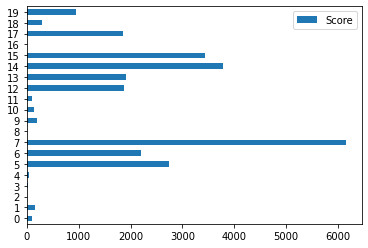

In [35]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [37]:
dt = DecisionTreeClassifier(max_depth=20,max_features=20,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r5.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [40]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 94.47498047696281
Test Prediction Score 93.42094724476719


In [41]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X7)
dt_score_test = accuracy_score(test_Y7,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 86.91075514874142
Test Prediction Score 88.79953957570622
Test Prediction Score 91.46045319786064
Test Prediction Score 87.57529083236285
Test Prediction Score 89.98321952516241
Test Prediction Score 87.46869226031616
Test Prediction Score 90.1500583751116
Test Prediction Score 93.31567378684552


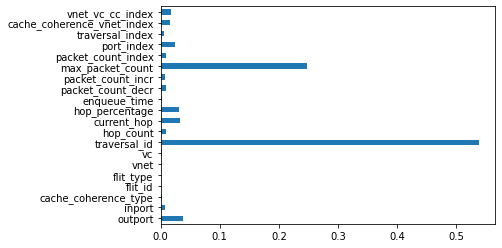

In [42]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

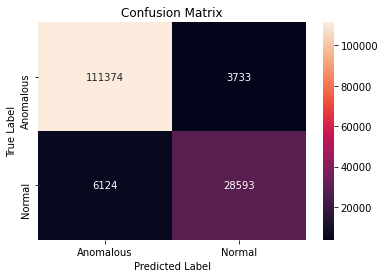

In [43]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [44]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96    115107
           1       0.88      0.82      0.85     34717

    accuracy                           0.93    149824
   macro avg       0.92      0.90      0.91    149824
weighted avg       0.93      0.93      0.93    149824



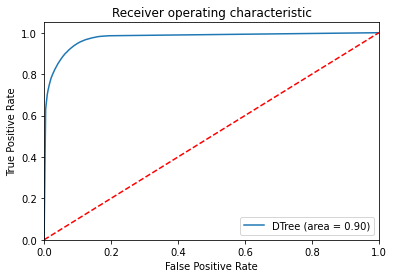

In [45]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [47]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r5.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [50]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.99232427597899
Test Prediction Score 99.43066531396839


In [51]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X7)
xgbc_score_test = accuracy_score(test_Y7,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 89.00805889961198
Test Prediction Score 89.82270467298684
Test Prediction Score 92.12937443201287
Test Prediction Score 91.24685375108005
Test Prediction Score 90.04469255179518
Test Prediction Score 91.00253199206186
Test Prediction Score 90.70290502025959
Test Prediction Score 91.4374682973567


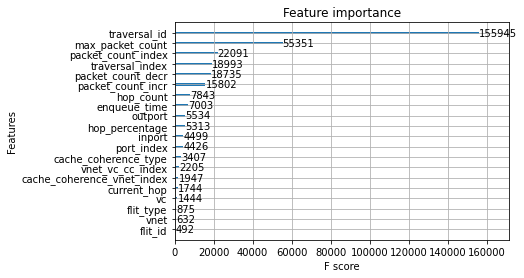

In [52]:
plot_importance(xgbc)
plt.show()

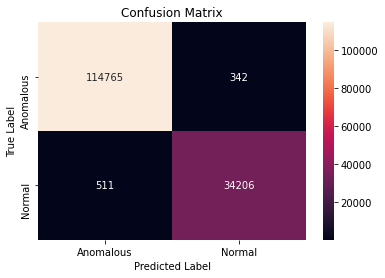

In [53]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [54]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    115107
           1       0.99      0.99      0.99     34717

    accuracy                           0.99    149824
   macro avg       0.99      0.99      0.99    149824
weighted avg       0.99      0.99      0.99    149824



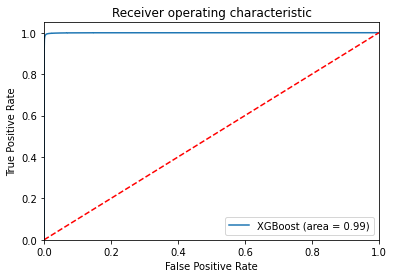

In [55]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()